# Load an artist portrait model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

artist_path = "AF_dataset/Pablo_Picasso/"
mu_artist = np.load(artist_path + "mean.npy")
cov_artist = np.load(artist_path + "cov.npy")

In [2]:
# sample an offset vector from the distribution
v_artist = np.random.multivariate_normal(mu_artist, cov_artist)
x_offset = v_artist[0:68]
y_offset = v_artist[68:]

# Load Natural Image and Landmarks

In [3]:
natural_img = "300w/indoor_037.png"
natural_pts = "300w/indoor_037.pts"

import os
import cv2
import numpy as np

with open(natural_pts) as pts_file:
    data = pts_file.readlines()[3:68+3]
    data = [np.array(line.split(), dtype=float) for line in data]
    landmarks = np.array(data) # x is cols y is rows
    
# print(landmarks)
control_points = landmarks.copy()
    
# print(landmarks.shape)
image = cv2.imread(natural_img)
im_rows = image.shape[0]
im_cols = image.shape[1]

print(control_points.shape)

(68, 2)


# Match and Perturb Landmarks

In [4]:
# normalize and center landmarks
x_landmarks = landmarks[:,0]
y_landmarks = landmarks[:,1]

# print(x_landmarks)
# print(y_landmarks)

x_landmarks /= im_cols
y_landmarks /= im_rows

# print(x_landmarks)
# print(y_landmarks)
nose_x = x_landmarks[33]
nose_y = y_landmarks[33]

x_landmarks -= nose_x
y_landmarks -= nose_y

print(x_landmarks)
print(y_landmarks)

[-2.19486228e-01 -2.14186826e-01 -2.09701796e-01 -1.98625150e-01
 -1.77014371e-01 -1.37796407e-01 -9.35604790e-02 -5.46742515e-02
 -6.66826347e-03  3.37401198e-02  5.95497006e-02  8.37221557e-02
  1.00526946e-01  1.07247904e-01  1.10099401e-01  1.13747305e-01
  1.15204790e-01 -1.42982036e-01 -1.22029940e-01 -9.24107784e-02
 -6.03149701e-02 -2.99592814e-02  1.12023952e-02  3.91520958e-02
  5.94718563e-02  8.75473054e-02  1.03465868e-01 -4.84670659e-03
 -1.01676647e-03  4.68502994e-03  1.11724551e-02 -4.11724551e-02
 -1.92778443e-02  0.00000000e+00  1.83377246e-02  3.31796407e-02
 -1.19229940e-01 -1.00689820e-01 -7.94922156e-02 -5.15425150e-02
 -7.87413174e-02 -9.90095808e-02  2.36000000e-02  4.82826347e-02
  6.80407186e-02  8.33329341e-02  6.71221557e-02  4.76371257e-02
 -7.28886228e-02 -4.68538922e-02 -1.81281437e-02  1.36646707e-03
  1.94359281e-02  4.02287425e-02  5.29832335e-02  3.94407186e-02
  1.95365269e-02 -4.62275449e-04 -1.91616766e-02 -5.31125749e-02
 -5.87652695e-02 -1.87568

In [5]:
# add offset
l_x = x_landmarks + x_offset
l_y = y_landmarks + y_offset
print(l_x)
print(l_y)

l_x += nose_x
l_y += nose_y

[-1.44120717e-01 -1.51064979e-01 -1.58233089e-01 -1.08763066e-01
 -1.07943634e-01 -1.08747559e-01 -8.00616356e-02 -7.57013273e-02
 -3.38021366e-02  3.57994776e-02  8.15095656e-02  1.39411518e-01
  1.81055464e-01  2.76484742e-01  2.83541029e-01  2.82009197e-01
  2.92733597e-01 -1.78419682e-01 -1.49743066e-01 -1.09036258e-01
 -5.50592519e-02 -2.70051563e-03  5.97798776e-02  1.20121634e-01
  1.81605139e-01  2.50062288e-01  2.82056756e-01  1.25200153e-02
  1.88014120e-02  1.24000240e-02  3.63885403e-04 -4.53376622e-02
 -3.22697560e-02 -1.30390376e-08  3.93210682e-02  8.27853887e-02
 -1.69372057e-01 -1.28439830e-01 -7.58168635e-02 -1.59565667e-02
 -7.67888119e-02 -1.22661731e-01  7.54988537e-02  1.21635423e-01
  1.73355129e-01  2.38705724e-01  1.61745626e-01  1.17065924e-01
 -4.19504908e-02 -1.09765633e-02  2.69915173e-02  4.55774627e-02
  6.16606860e-02  7.15798898e-02  7.40501131e-02  6.71015940e-02
  5.67332995e-02  3.25511409e-02  7.58843629e-03 -2.80298998e-02
 -2.97556395e-02  1.96121

In [6]:
# map the landmarks back into the original image
l_x *= im_cols
l_y *= im_rows

print(l_x)
print(l_y)

[339.25420143 333.45574279 327.47037107 368.77783956 369.46206585
 368.79078857 392.74353427 396.38439167 431.3702159  489.48756379
 527.65548728 576.00361788 610.77631269 690.45975996 696.35175894
 695.07267981 704.02755363 310.61456567 334.55953969 368.54972454
 413.62052462 457.34006945 509.51119781 559.89656461 611.2352912
 668.39701083 695.11239116 470.04921279 475.29417906 469.94902005
 459.89884431 421.73805203 432.64975372 459.59498911 492.42809195
 528.72079957 318.16933275 352.3477417  396.28791894 446.27126679
 395.47634206 357.1724549  522.63654282 561.16057814 604.34653259
 658.91427941 594.65259735 557.34504623 424.56634019 450.42956962
 482.13291697 497.65218139 511.08167281 519.36420802 521.42684446
 515.62483098 506.96730512 486.77520266 465.9313443  436.19003369
 434.74904102 475.97114326 491.22939603 502.98668192 508.85940332
 501.9987579  489.36233822 473.84147515]
[209.54186548 253.63170962 298.01520704 325.80770358 366.20554946
 406.55548579 444.81041996 487.09083

# Apply Style Transfer With TPS Interpolation

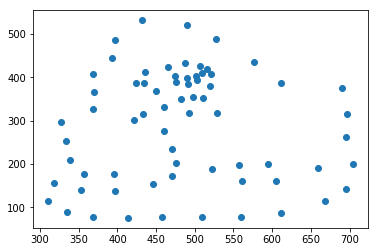

In [7]:
target_points = np.zeros((68,2))
target_points[:,0] = l_x
target_points[:,1] = l_y
plt.figure(1)
plt.scatter(l_x, l_y)

In [8]:
matches = list()
for ipoint in range(0, control_points.shape[0]):
    matches.append(cv2.DMatch(ipoint, ipoint, 0))
    
# print(control_points)
# print(target_points)
    
target_image = image.copy()
control_image = image.copy()
    
for i in range(control_points.shape[0]):
    control = np.round(control_points[i])
    target = np.round(target_points[i])
    control_image = cv2.circle(control_image, (int(control[0]), int(control[1])), radius = 0, color=(0,255,0), thickness = 3)
    target_image = cv2.circle(target_image, (int(target[0]), int(target[1])), radius = 0, color = (0,255,0), thickness = 3)
    
cv2.imshow("control", control_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("target", target_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
    
wrap_control_points = np.array([control_points])
wrap_target_points = np.array([target_points])
    
tps = cv2.createThinPlateSplineShapeTransformer()
tps.estimateTransformation(wrap_control_points, wrap_target_points, matches)
warped = tps.warpImage(image)
for i in range(target_points.shape[0]):
    control = np.round(control_points[i])
    target = np.round(target_points[i])
#     control_image = cv2.circle(image, (int(control[0]), int(control[1])), radius = 0, color=(0,255,0), thickness = 3)
    warped = cv2.circle(warped, (int(target[0]), int(target[1])), radius = 0, color = (0,255,0), thickness = 3)

cv2.imshow("warped", warped)
cv2.waitKey(0)
cv2.destroyAllWindows()